# Install Packages
Several uncommon packages installed here

In [2]:
%pip install pygbif
%pip install mapbox_vector_tile
%pip install geopandas
%pip install geopandas matplotlib rasterio


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Info for download
Username and email for downloading the data used in this. Password not included (obviously)

In [32]:
GBIF_PWD = 'TemporaryPasswordForDownload'
GBIF_USER = "bjancso-szabo"
GBIF_EMAIL = 'basil.jancso-szabo@mail.mcgill.ca'

# Download Files

Initiate the download of the data for 16 species. Note that currently Ursus Horribilis is not being found. Maps downloaded from Natural Earth, specifically https://www.naturalearthdata.com/downloads/10m-natural-earth-1/10m-natural-earth-1-with-shaded-relief-and-water/

In [66]:
from pygbif import species as species
from pygbif import occurrences as occ

species_list = ["Ursus arctos", "Ursus americanus","Canis lupus", "Canis latrans", "Vulpes vulpes", "Puma concolor", 
"Lynx canadensis", "Gulo gulo", "Cervus canadensis", "Odocoileus virginianus", 
"Odocoileus hemionus","Alces americanus", "Ovis canadensis", "Oreamnos americanus", 
"Rangifer tarandus", "Lepus americanus"]
species_common_names = ["Grizzly bears", "Black bears", "Wolves", "Coyotes", "Red fox", 
						"Cougars", "Canada lynx","Wolverine", "Elk", "White-tailed deer", 
						"Mule deer", "Moose", "Bighorn sheep", "Mountain goats", "Woodland caribou", "Snowshoe hare"]

speciesForDict = species_list
speciesForDict[8] = "Cervus elaphus"

dict_species = dict(zip(speciesForDict,species_common_names))

keys = []
for species_name in species_list:
	try:
		key = species.name_backbone(species_name,verbose=False)['usageKey']
		keys.append(key)
	except KeyError:
		print(f"Species name not found in GBIF: {species_name}")
		
print(keys)
print(dict_species)


#sorted(x.items(), key=lambda z:z[1], reverse=True)
# [2433433, 2433407, 5219173, 5219153, 5219243, 2435099, 2435263, 5219073, 8600904, 2440965, 2440974, 4262283, 2441119, 2441151, 5220114, 2436794]



[2433433, 2433407, 5219173, 5219153, 5219243, 2435099, 2435263, 5219073, 2440958, 2440965, 2440974, 4262283, 2441119, 2441151, 5220114, 2436794]
{'Ursus arctos': 'Grizzly bears', 'Ursus americanus': 'Black bears', 'Canis lupus': 'Wolves', 'Canis latrans': 'Coyotes', 'Vulpes vulpes': 'Red fox', 'Puma concolor': 'Cougars', 'Lynx canadensis': 'Canada lynx', 'Gulo gulo': 'Wolverine', 'Cervus elaphus': 'Elk', 'Odocoileus virginianus': 'White-tailed deer', 'Odocoileus hemionus': 'Mule deer', 'Alces americanus': 'Moose', 'Ovis canadensis': 'Bighorn sheep', 'Oreamnos americanus': 'Mountain goats', 'Rangifer tarandus': 'Woodland caribou', 'Lepus americanus': 'Snowshoe hare'}


In [53]:
query = { "type": "and",
  "predicates": [
    {  "type": "in",
        "key": "TAXON_KEY",
        "values": keys},
    {
      "type": "within",
      "geometry": "POLYGON((-114.0805721 50.0437601, -115.0408459 51.8777362, -117.7137423 54.0301079, -119.9779773 53.5716259, -116.0885596 50.0815029, -114.0805721 50.0437601))"
    },
    {
      "type": "equals",
      "key": "DATASET_KEY",
      "value": "50c9509d-22c7-4a22-a47d-8c48425ef4a7"
    }
     ]}

occ.download(query, user=GBIF_USER,email=GBIF_EMAIL,pwd=GBIF_PWD)



INFO:Your download key is 0002727-241126133413365


('0002727-241126133413365',
 {'creator': 'bjancso-szabo',
  'notification_address': ['basil.jancso-szabo@mail.mcgill.ca'],
  'sendNotification': True,
  'predicate': {'type': 'and',
   'predicates': [{'type': 'in',
     'key': 'TAXON_KEY',
     'values': [2433433,
      2433407,
      5219173,
      5219153,
      5219243,
      2435099,
      2435263,
      5219073,
      8600904,
      2440965,
      2440974,
      4262283,
      2441119,
      2441151,
      5220114,
      2436794]},
    {'type': 'within',
     'geometry': 'POLYGON((-114.0805721 50.0437601, -115.0408459 51.8777362, -117.7137423 54.0301079, -119.9779773 53.5716259, -116.0885596 50.0815029, -114.0805721 50.0437601))'},
    {'type': 'equals',
     'key': 'DATASET_KEY',
     'value': '50c9509d-22c7-4a22-a47d-8c48425ef4a7'}]},
  'format': 'SIMPLE_CSV'})

# Data Exploration

Number of rows of df: 7612


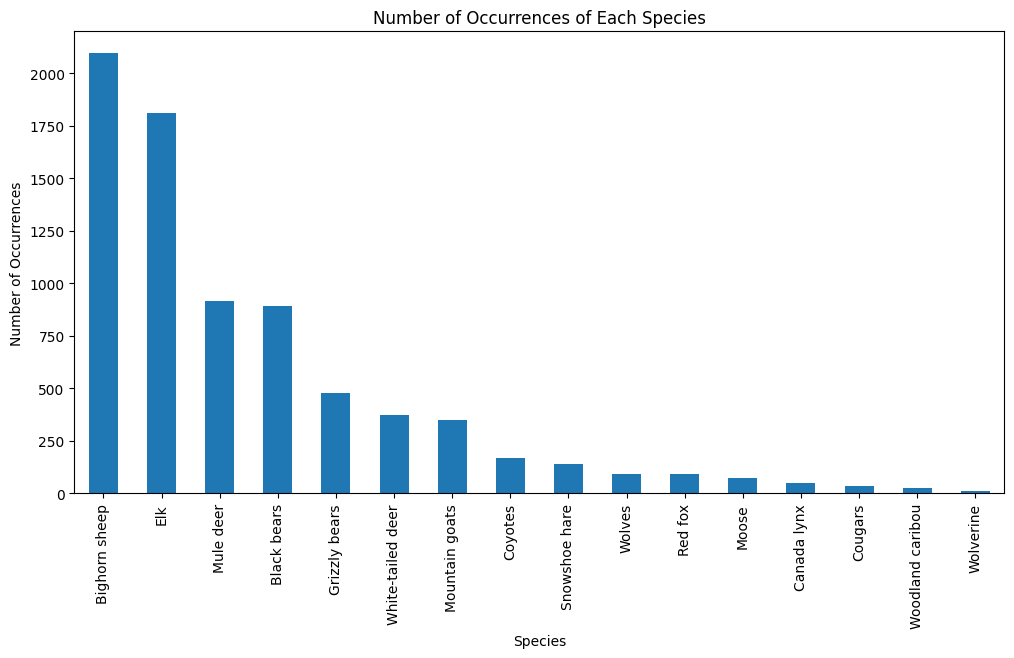

Number of different species: 16
Species in species_list but not in the data: set()


In [78]:
# Convert to a pandas dataframe
import pandas as pd
from pygbif import species
import matplotlib.pyplot as plt
# Read the csv file into a pandas dataframe


df = pd.read_csv("Nov27Download.csv",
    delimiter='\t',  # Specify the delimiter if it's not a comma
    na_values=['', 'NA', 'null'],  # Specify additional strings to recognize as NA/NaN
    on_bad_lines='skip'  # Skip lines with too many fields
)
print("Number of rows of df:", len(df))

# Plot the number of occurrences of each species, including zero counts
plt.figure(figsize=(12, 6))
species_counts = df['species'].value_counts()
species_counts.index = species_counts.index.map(dict_species)
species_counts.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Species')
plt.show()


# Print the number of different species
print("Number of different species:", len(df['species'].unique()))

# See what species are present in species_list but not in the data
print("Species in species_list but not in the data:", set(speciesForDict) - set(df['species'].unique()))


/var/folders/0z/p40hcj_16lxbtp07dg2s4ymh0000gq/T/ipykernel_6454/4060957985.py:52: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf['species'] == species].plot(ax=ax, color=color, markersize=5, label=dict_species[species])


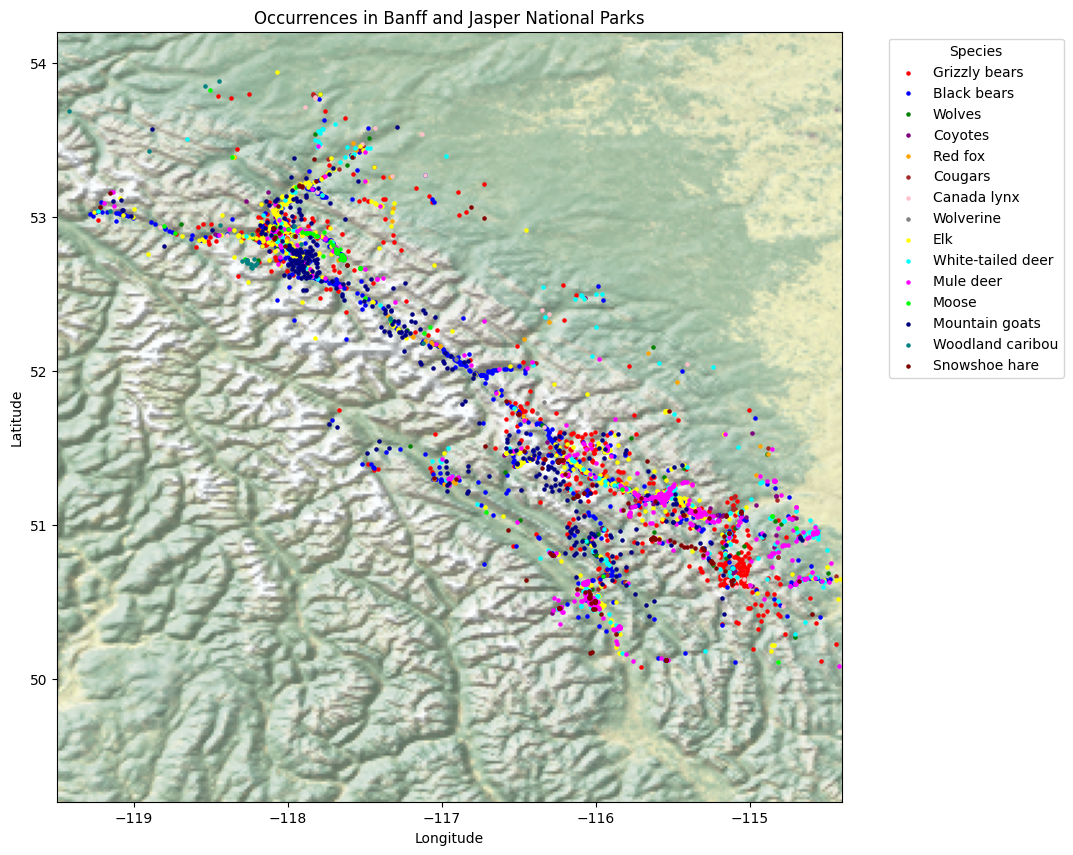

In [80]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from shapely.geometry import Point

df = df[df['species'] != 'Ovis canadensis']

# Convert the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']))

# Load the .tif file
tif_path = 'NE1_HR_LC_SR_W.tif'
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(15, 10))
    # Define the bounding box for the region of interest
    min_lon, min_lat, max_lon, max_lat = -119.5, 49.2, -114.4, 54.2

    # Calculate the center of the bounding box
    center_lon = (min_lon + max_lon) / 2
    center_lat = (min_lat + max_lat) / 2

    # Set the extent of the map to the bounding box
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)

    show(src, ax=ax)

    # Plot the points
    
    species_colors = {
        "Ursus arctos": "red",  # Brown Bear
        "Ursus americanus": "blue",  # American Black Bear
        "Canis lupus": "green",  # Gray Wolf
        "Canis latrans": "purple",  # Coyote
        "Vulpes vulpes": "orange",  # Red Fox
        "Puma concolor": "brown",  # Cougar
        "Lynx canadensis": "pink",  # Canada Lynx
        "Gulo gulo": "gray",  # Wolverine
        "Cervus elaphus": "yellow",  # Elk
        "Odocoileus virginianus": "cyan",  # White-tailed Deer
        "Odocoileus hemionus": "magenta",  # Mule Deer
        "Alces americanus": "lime",  # Moose
        "Ovis canadensis": "olive",  # Bighorn Sheep
        "Oreamnos americanus": "navy",  # Mountain Goat
        "Rangifer tarandus": "teal",  # Caribou
        "Lepus americanus": "maroon"  # Snowshoe Hare
    }

    for species, color in species_colors.items():
        gdf[gdf['species'] == species].plot(ax=ax, color=color, markersize=5, label=dict_species[species])

    plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Occurrences in Banff and Jasper National Parks')
    plt.show()

In [85]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
# Randomly sample numRandomPoints latitude/longitudes from POLYGON((-114.0805721 50.0437601, -115.0408459 51.8777362, -117.7137423 54.0301079, -119.9779773 53.5716259, -116.0885596 50.0815029, -114.0805721 50.0437601))
import random
from shapely.geometry import Polygon, Point

import matplotlib.pyplot as plt

# Function that returns a GeoDataFrame with random points
def generate_random_points(n_points:int, polygon: Polygon):
    random_points = []
    minx, miny, maxx, maxy = polygon.bounds

    while len(random_points) < n_points:
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(p):
            random_points.append(p)

    # Split coordinates into latitude and longitude
    random_points_lat = [point.y for point in random_points]
    random_points_lon = [point.x for point in random_points]

    # Create a GeoDataFrame with the random points
    gdf_random = gpd.GeoDataFrame(geometry=gpd.points_from_xy(random_points_lon, random_points_lat))

    return gdf_random

# Function to plot occurences of a single species
def plot_occurences(df: pd.DataFrame, species_name: str, tif_path: str,polygon: Polygon):
    df_species = df[df['species'] == species_name]

    min_lon, min_lat, max_lon, max_lat = polygon.bounds

    with rasterio.open(tif_path) as src:
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_xlim(min_lon, max_lon)
        ax.set_ylim(min_lat, max_lat)
        show(src, ax=ax)

        gdf_species = gpd.GeoDataFrame(df_species, geometry=gpd.points_from_xy(df_species['decimalLongitude'], df_species['decimalLatitude']))
        gdf_species.plot(ax=ax, color='blue', markersize=5, label=dict_species[species_name])

        plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Occurrences of {dict_species[species_name]} in Banff and Jasper National Parks')
        plt.show()



def plot_occurences_w_pseudoabsences(df: pd.DataFrame, species_name: str, tif_path: str,polygon: Polygon):
    # Filter the dataframe for the specified species
    df_species = df[df['species'] == species_name]
    df_other = df[df['species'] != species_name]

    min_lon, min_lat, max_lon, max_lat = polygon.bounds
    
    # Convert the dataframes to GeoDataFrames
    gdf_species = gpd.GeoDataFrame(df_species, geometry=gpd.points_from_xy(df_species['decimalLongitude'], df_species['decimalLatitude']))
    gdf_other = gpd.GeoDataFrame(df_other, geometry=gpd.points_from_xy(df_other['decimalLongitude'], df_other['decimalLatitude']))
    gdf_random = generate_random_points(1000, polygon)
    
    # Load the .tif file
    with rasterio.open(tif_path) as src:
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Set the extent of the map to the bounding box
        ax.set_xlim(min_lon, max_lon)
        ax.set_ylim(min_lat, max_lat)
        
        show(src, ax=ax)
        
        # Plot the species occurrences
        gdf_random.plot(ax=ax, color='red', markersize=5, label='Random Background Points')
        gdf_other.plot(ax=ax, color='green', markersize=5, label='Target Group Background Points')
        gdf_species.plot(ax=ax, color='blue', markersize=5, label=dict_species[species_name])
        
        plt.legend(title="Data Points", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Occurrences of {dict_species[species_name]} in Banff and Jasper National Parks')
        plt.show()


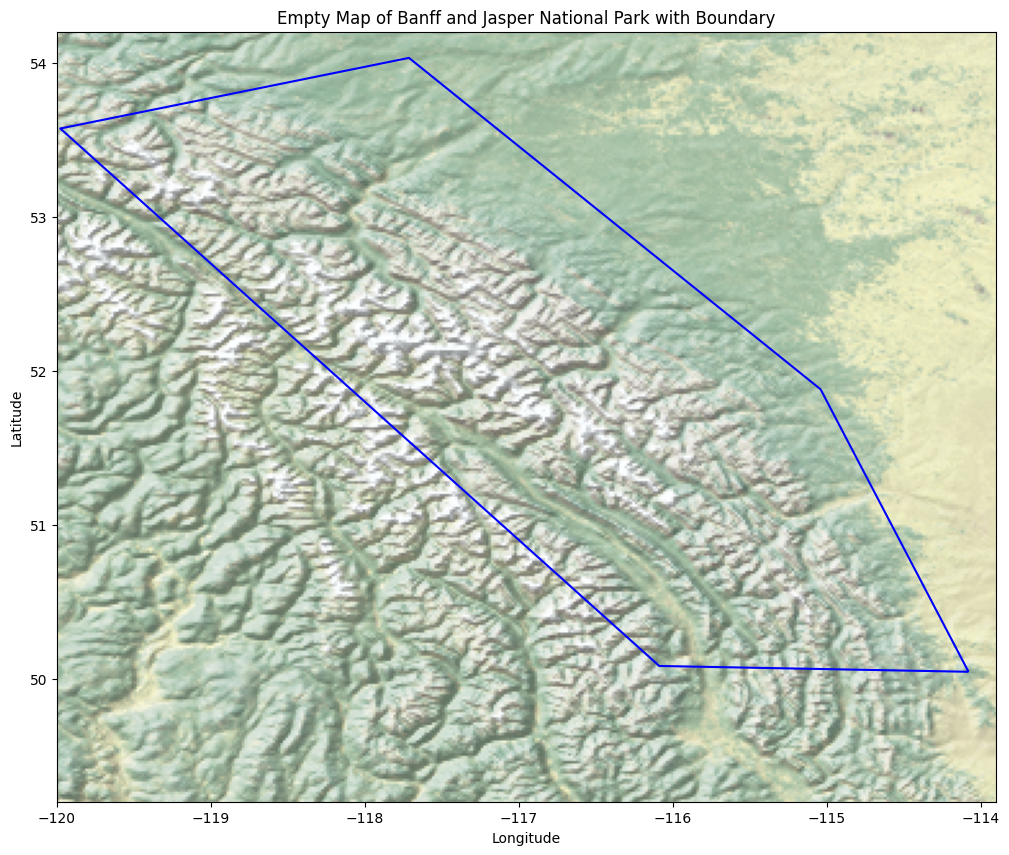

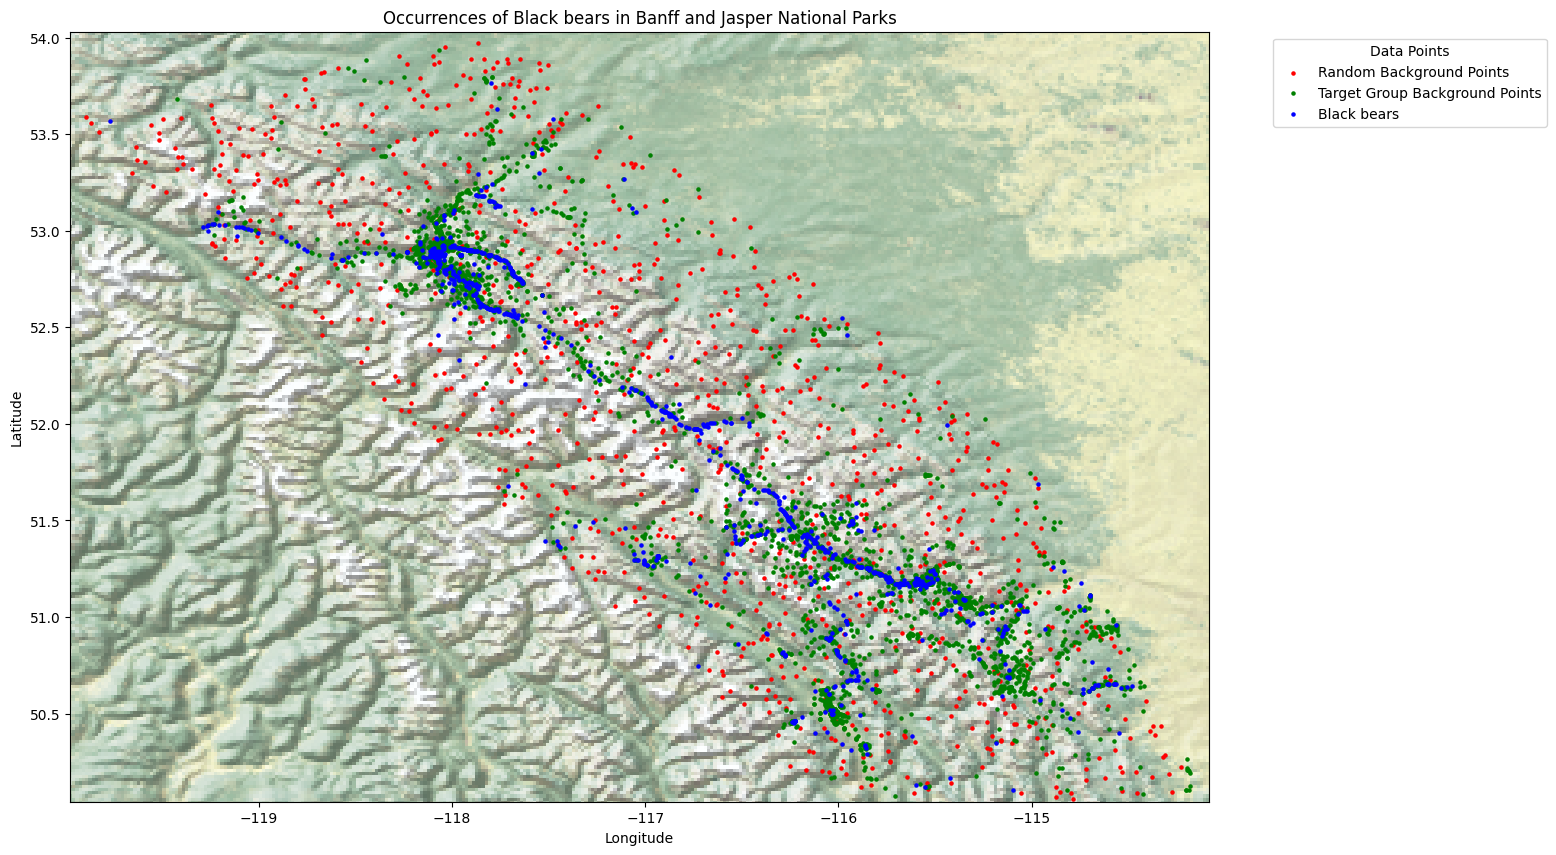

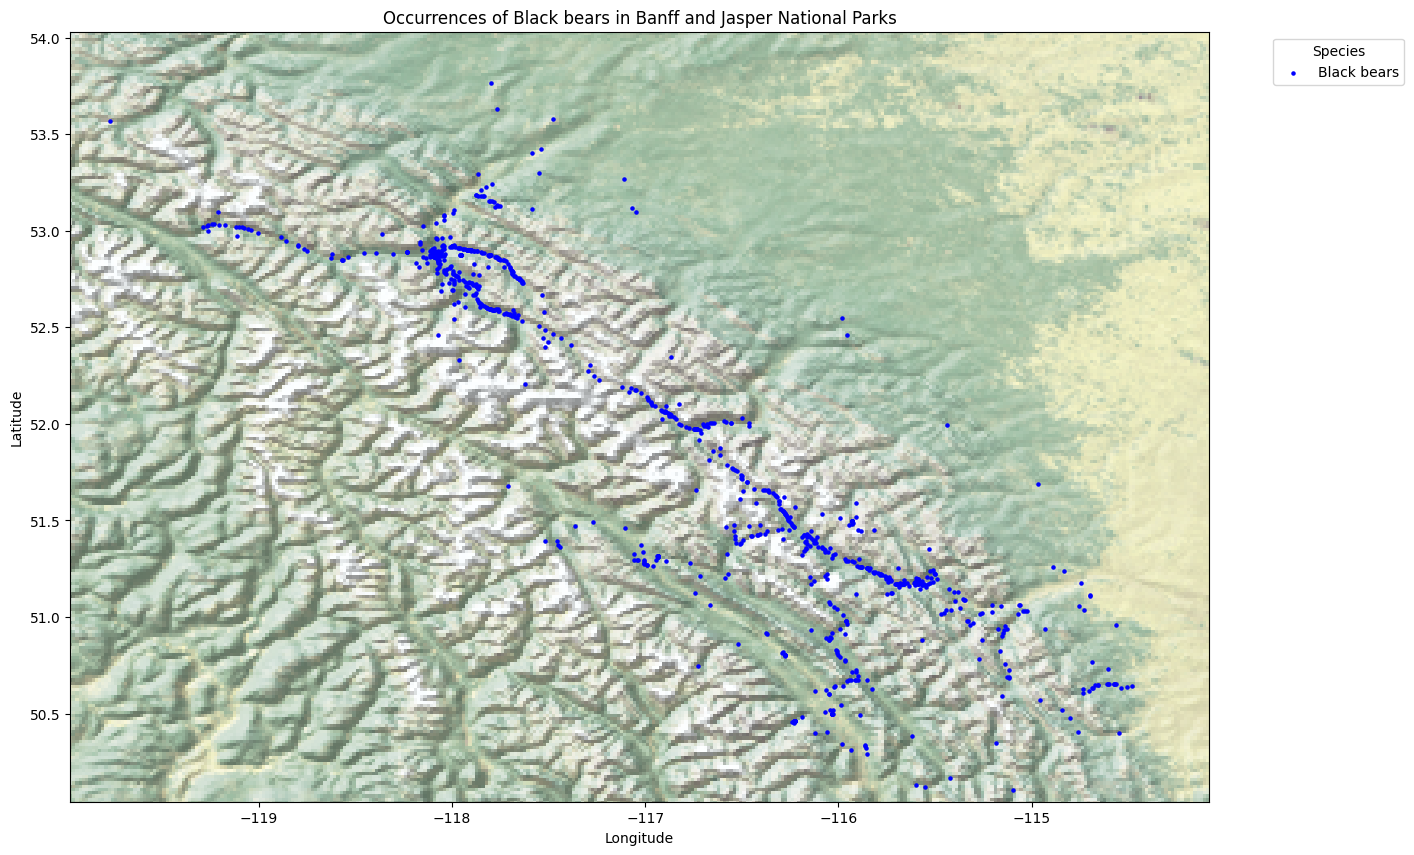

In [ ]:
numRandomPoints = 1000
polygon = Polygon([[-114.0805721, 50.0437601], [-115.0408459, 51.8777362], [-117.7137423, 54.0301079], 
                   [-119.9779773, 53.5716259], [-116.0885596, 50.0815029], [-114.0805721, 50.0437601]])

# Plot empty map with boundary of polygon
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlim(min_lon-0.5, max_lon+0.5)
    ax.set_ylim(min_lat, max_lat)
    show(src, ax=ax)
    gdf_polygon = gpd.GeoDataFrame(geometry=[polygon])
    gdf_polygon.boundary.plot(ax=ax, color='blue')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Empty Map of Banff and Jasper National Park with Boundary')
    plt.show()

plot_occurences_w_pseudoabsences(df, 'Ursus americanus', tif_path, polygon)

plot_occurences(df, 'Ursus americanus', tif_path, polygon)